In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [24]:
import scipy.io as sio
import pickle

In [25]:
with open('gp_full_pred_snelson.pickle', 'rb') as handle:
    samples = pickle.load(handle)


In [26]:
df = sio.loadmat('snelson1d.mat')
X = df['X']
Y = df['Y']
X_t = df['tX']
Y_t = df['tY']

In [27]:
X1 = X[np.argsort(X, axis=0)]
Y1 = Y[np.argsort(X, axis=0)] 
X1 = X1.reshape(-1,1)
Y1 = Y1.reshape(-1,1)

In [28]:
M = 7
N_star = 200
X_star = np.linspace(-0.5, 6.5, N_star)[:, None]

intervals = [(0.75,1.25), (2.5, 3.0), (4.25, 4.75)]

In [29]:
X_train, Y_train = X.copy(), Y.copy()
X_test, Y_test = [], [] 
test_indices = []
for a, b in intervals:
    indices = list(np.where(np.logical_and(X1.flatten() > a, X1.flatten() < b))[0] )
    if test_indices is None:
        test_indices = indices
    else:
        test_indices = test_indices + indices
#     print(test_indices)
# print(test_indices)
train_indices = np.arange(X.shape[0])
test_indices = np.asarray(test_indices)
train_indices = np.setdiff1d(train_indices, test_indices)
X_test, Y_test = X1[test_indices,:], Y1[test_indices]
X_train, Y_train = X1[train_indices,:], Y1[train_indices]

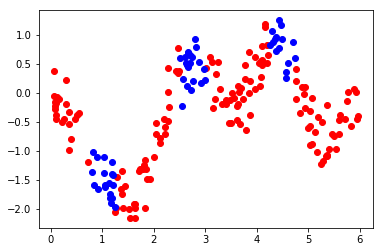

In [30]:
N_test = Y_test.size
plt.plot(X_train, Y_train, 'ro')
plt.plot(X_test, Y_test, 'bo')


In [31]:
sigma_samples = samples['sigma']
alpha_samples = samples['alpha']
rho_samples = samples['rho']
eta_samples = samples['eta']
N_samples = sigma_samples.size
sigma_mean = np.mean(samples['sigma'])
sigma_median = np.nanmedian(samples['sigma'])

l_mean = np.mean(samples['rho'])
l_median = np.nanmedian(samples['rho'])

sigvar_mean = np.mean(samples['alpha'])
sigvar_median = np.nanmedian(samples['alpha'])

print("mean of noise variance: %.2f" % sigma_mean)
print("median of noise variance: %.2f"% sigma_median)
print("mean of lengthscale: %.3f"% l_mean)
print("median of lengthscale: %.3f"% l_median)
print("mean of signal variance: %.3f"% sigvar_mean)
print("median of signal variance: %.3f"% sigvar_median)

mean of noise variance: 0.21
median of noise variance: 0.21
mean of lengthscale: 0.619
median of lengthscale: 0.622
mean of signal variance: 0.981
median of signal variance: 0.958


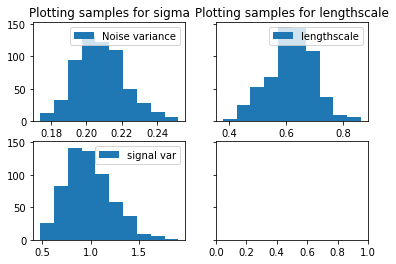

In [32]:
f, axs = plt.subplots(2,2, sharey=True)
axs[0,0].hist(sigma_samples)
axs[0,0].set_title('Plotting samples for sigma')
axs[0,0].legend(['Noise variance'])
axs[0,1].hist(rho_samples)
axs[0,1].set_title('Plotting samples for lengthscale')
axs[0,1].legend(['lengthscale'])
axs[1,0].hist(alpha_samples)
# axs[1,0].set_title('Plotting samples for signalvariance')
axs[1,0].legend(['signal var'])

In [36]:
f_star_full = samples['f_star']
y_star_full = samples['y_star']

In [38]:
f_test = f_star_full[:,:55]
y_test = y_star_full[:,:55]
f_star = f_star_full[:,55:]
y_star = y_star_full[:,55:]

In [44]:
f_test_mean = np.mean(f_test, axis=0)
f_test_var = np.var(f_test, axis=0)
f_star_mean = np.mean(f_star, axis=0)
f_star_var = np.var(f_star, axis=0)

In [45]:
y_test_mean = np.mean(y_test, axis=0)
y_test_var = np.var(y_test, axis=0)
y_star_mean = np.mean(y_star, axis=0)
y_star_var = np.var(y_star, axis=0)


Plot for Prediction of latent function(f*) for 1D regression

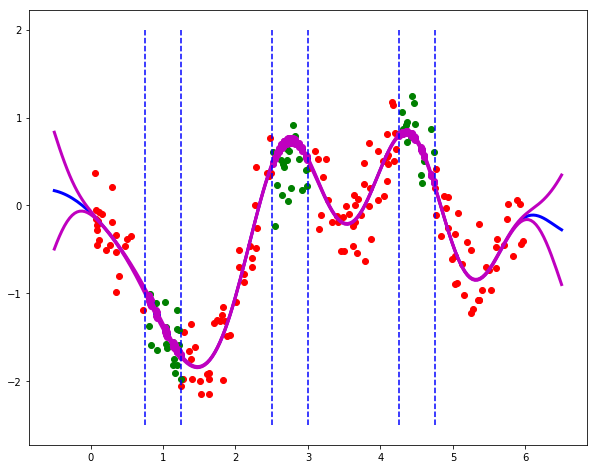

In [49]:
fig, ax = plt.subplots(1,1 , figsize=(10,8))
ax.plot(X_train, Y_train, 'ro')
ax.plot(X_test, Y_test, 'go')
ax.plot(X_test, f_test_mean, 'bo', lw=3)
ax.plot(X_star, f_star_mean, 'b-', lw=3)
ax.plot(X_test, f_test_mean + 2*f_test_var, 'mo', lw=3)
ax.plot(X_test, f_test_mean - 2*f_test_var, 'mo', lw=3)
ax.plot(X_star, f_star_mean + 2*f_star_var, 'm-', lw=3)
ax.plot(X_star, f_star_mean - 2*f_star_var, 'm-', lw=3)
for i in intervals:
    ax.plot([i[0], i[0]], [-2.5, 2], 'b--')
    ax.plot([i[1], i[1]], [-2.5, 2], 'b--')

Plot for Predictive observations(y) for 1D regression

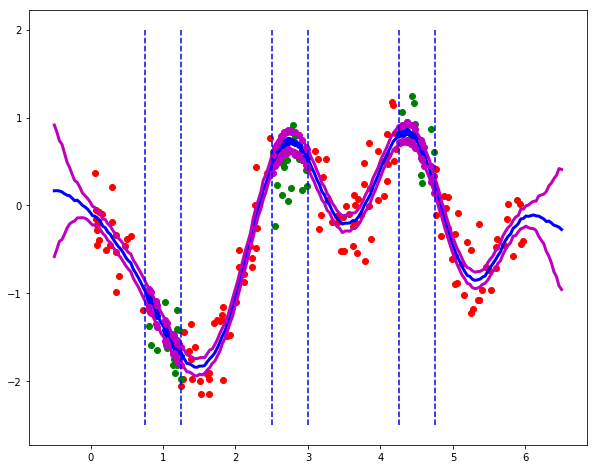

In [50]:
fig, ax = plt.subplots(1,1 , figsize=(10,8))
ax.plot(X_train, Y_train, 'ro')
ax.plot(X_test, Y_test, 'go')
ax.plot(X_test, y_test_mean, 'bo', lw=3)
ax.plot(X_star, y_star_mean, 'b-', lw=3)
ax.plot(X_test, y_test_mean + 2*y_test_var, 'mo', lw=3)
ax.plot(X_test, y_test_mean - 2*y_test_var, 'mo', lw=3)
ax.plot(X_star, y_star_mean + 2*y_star_var, 'm-', lw=3)
ax.plot(X_star, y_star_mean - 2*y_star_var, 'm-', lw=3)
for i in intervals:
    ax.plot([i[0], i[0]], [-2.5, 2], 'b--')
    ax.plot([i[1], i[1]], [-2.5, 2], 'b--')

In [56]:
def RMSE(Y_star, Y_test):
    rmse = np.sqrt(np.mean(np.square(Y_star - Y_test)))
    return rmse

def NMSE(Y_star, Y_test):
    nmse = np.mean(np.square(Y_star - Y_test)) / np.mean(np.square(Y_test - np.mean(Y_test)))
    return nmse

def MLPPD(Y_star, Y_test, var_star):
    mlppd = 0.5* (np.mean(np.square(Y_star - Y_test)/var_star + np.log(var_star) + np.log(2*np.pi))) / Y_star.size
    return mlppd

def MLPPD2(Y_star, Y_test, var_star):
    mlppd2 = 0.5* (np.mean(np.square(Y_star - Y_test)/(var_star*np.abs(Y_test)) + np.log(var_star) + np.log(2*np.pi))) / Y_star.size
    return mlppd2

In [57]:
RMSE_test = RMSE(y_test_mean, Y_test)
NMSE_test = NMSE(y_test_mean, Y_test)
MLPPD_test1 = MLPPD(y_test_mean, Y_test, f_test_var)
# MLPPD_test2 = MLPPD(y_star_mean, Y_test, y_star_var)
MLPPD_test2 = MLPPD2(y_test_mean, Y_test, f_test_var+np.mean(sigma_samples, axis=0))
print("RMSE error: %.3f"%RMSE_test)
print("NMSE error: %.3f"%NMSE_test)

print("MLPPD: %.3f"%MLPPD_test1)
print("MLPPD2 : %.3f"%MLPPD_test2)



RMSE error: 1.475
NMSE error: 1.980
MLPPD: 1.999
MLPPD2 : 0.135
